# Analyzing Where Do People Drink?


This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. 

We will need the following libraries:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>Importing the Data</b>


Load the csv:


In [ ]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [ ]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Part 1</b>:  Display the data types of each column using the attribute dtype.


In [ ]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Part 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [ ]:
df_group = df.groupby('continent')['wine_servings'].agg("sum")
df_group

continent
Africa            862
Asia              399
Europe           6400
North America     564
Oceania           570
South America     749
Name: wine_servings, dtype: int64

<b>Part 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [ ]:
beer = df.groupby('continent')['beer_servings'].describe()
beer

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


<b>Part 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


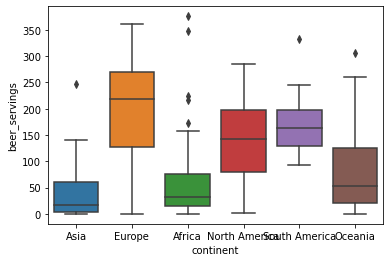

In [ ]:
import seaborn as sns 
ax = sns.boxplot(x=df['continent'],y=df['beer_servings'])
ax

<b>Part 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


(0.0, 411.9337048830688)

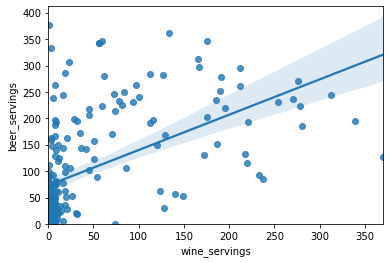

In [ ]:
import seaborn as sns 
sns.regplot(x='wine_servings',y='beer_servings', data=df)
plt.ylim(0,)

<b> Part 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then we calculate $R^{2}$:


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['total_litres_of_pure_alcohol']]
Y = df['wine_servings']
lm.fit(X,Y)
Yhat=lm.predict(X)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4456875459787605


<br>
<b>Note:</b> We use <code>test_size = 0.10</code> in the following parts.


<b>Part 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data:


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df[['total_litres_of_pure_alcohol']]
x = df.drop('total_litres_of_pure_alcohol', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
print('test samples : ', x_test.shape[0])
print('training samples : ', y_test.shape[0])
lm = LinearRegression()
lm.fit(x_train[['wine_servings','beer_servings','spirit_servings']], y_train)
print(lm.score(x_test[['wine_servings','beer_servings','spirit_servings']], y_test))

test samples :  20
training samples :  20
0.5900674800367456


<b>Part 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = df[['total_litres_of_pure_alcohol']]
x = df.drop('total_litres_of_pure_alcohol', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
print('test samples : ', x_test.shape[0])
print('training samples : ', y_test.shape[0])

pr=PolynomialFeatures(degree=3, include_bias=False)
x_train_pr=pr.fit_transform(x_train[['wine_servings','beer_servings','spirit_servings']])
x_test_pr=pr.fit_transform(x_test[['wine_servings','beer_servings','spirit_servings']])

poly=LinearRegression()
poly.fit(x_test_pr, y_test)
yhat=poly.predict(x_test_pr)
yhat[0:5]
print('Predicted values:', yhat[0:4])
print('True values:', y_test[0:4].values)
poly.score(x_test_pr, y_test)

test samples :  20
training samples :  20
Predicted values: [[8.2]
 [2.2]
 [1.7]
 [7.6]]
True values: [[8.2]
 [2.2]
 [1.7]
 [7.6]]


1.0

<b>Part 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data.


In [ ]:
from sklearn.linear_model import Ridge

pr=PolynomialFeatures(degree=2)
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)
RidgeModel.score(x_test_pr, y_test)

predicted: [[8.50752455]
 [2.6026045 ]
 [0.67872207]
 [8.16204083]]
test set : [[8.2]
 [2.2]
 [1.7]
 [7.6]]


0.6801317028931033

<b>Part 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. 


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['wine_servings','beer_servings','spirit_servings']])
x_test_pr=pr.fit_transform(x_test[['wine_servings','beer_servings','spirit_servings']])

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)
RidgeModel.score(x_test_pr, y_test)

predicted: [[8.59135024]
 [2.55049551]
 [0.84182382]
 [7.91923482]]
test set : [[8.2]
 [2.2]
 [1.7]
 [7.6]]


0.6395353494353714